# Assignment 3 Part 2

Machine Learning Lab

Name: Gourav Kumar Shaw

Enrolment No.: 2020CSB010

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

## Task 4

Download the Forest Cover Type dataset (https://www.kaggle.com/uciml/forest-cover-type-dataset) and pre-process the dummy variables to create training, test, and development set. Reduce the train data size if the system unable to process the whole dataset.

In [4]:
import pandas as pd

_FILE_PATH = '/content/drive/MyDrive/ML_DRIVE/Assign_3/covtype.csv'

dataset = pd.read_csv(_FILE_PATH)

dataset

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [5]:
# Let's check for missing values once
# This method calculates the sum of True values (which are treated as 1)
# along each column in the DataFrame. In other words, it counts the number
# of missing values in each column of the DataFrame.
dataset.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [6]:
dataset.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
from sklearn.preprocessing import StandardScaler

def standardize(df: "pd.DataFrame", col_name: "str") -> "pd.DataFrame":
    scaler = StandardScaler()

    df[[col_name]] = pd.DataFrame(
        data=scaler.fit_transform(df[[col_name]]),
        index=df.index,
        columns=[col_name]
    )
    return df

In [8]:
_columns_to_scale = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                    'Horizontal_Distance_To_Fire_Points']

for _col in _columns_to_scale:
   dataset = standardize(dataset, _col)

dataset

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,0,0,0,0,0,0,0,0,0,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,0,0,0,0,0,0,0,0,0,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,0,0,0,0,0,0,0,0,0,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,0,0,0,0,0,0,0,0,0,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,...,0,0,0,0,0,0,0,0,0,3
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,...,0,0,0,0,0,0,0,0,0,3
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,...,0,0,0,0,0,0,0,0,0,3
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,...,0,0,0,0,0,0,0,0,0,3


In [9]:
# Counter(y): This line uses the Counter class from the collections module to count the occurrences of each unique element in the sequence y.
# It essentially creates a dictionary-like object where the keys are the unique elements in y, and the values are the counts of each unique element.

# For example, if y contains the following values: [1, 2, 2, 3, 1, 1, 2], then before_dist
# will be a dictionary-like object like this: {1: 3, 2: 3, 3: 1}, indicating that there are 3 occurrences of 1, 3 occurrences of 2, and 1 occurrence of 3 in y.

In [10]:
def plot_count(y):
  before_dist = Counter(y)
  print("Before undersampling: ", before_dist)
  plt.xlabel("Count")
  plt.ylabel("Cover Type")
  plt.title("Count of each cover type")
  plt.bar(before_dist.keys(), before_dist.values())

Before undersampling:  Counter({2: 283301, 1: 211840, 3: 35754, 7: 20510, 6: 17367, 5: 9493, 4: 2747})


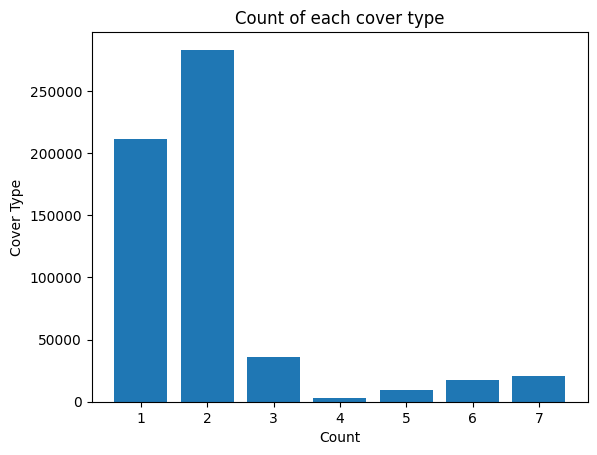

In [11]:
X = dataset.drop('Cover_Type', axis = 1)
y = dataset['Cover_Type']

plot_count(y)

In [12]:
dataset[['Cover_Type']].value_counts()

Cover_Type
2             283301
1             211840
3              35754
7              20510
6              17367
5               9493
4               2747
dtype: int64

In [13]:
# NOTE: class imbalance is present but removing it will
# remove the data that cover_type 2 is the most common data in world

dataset = dataset.sample(frac=0.1)

X = dataset.drop('Cover_Type', axis=1)
y = dataset[['Cover_Type']]


In [14]:
# 80% as train
# 10% as validation
# 10% as train

from sklearn.model_selection import train_test_split

X_train, _X, y_train, _y = train_test_split(X, y, train_size=0.8)
X_test,X_val, y_test, y_val = train_test_split(_X, _y, train_size=0.5)

## Task 5

Apply multi-class classification in SVM using Forest Cover Type dataset.

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(46480, 54)
(5810, 54)
(5811, 54)


In [16]:
# make_pipeline(StandardScaler(), SVC(gamma='auto')):
# This line creates a machine learning pipeline using the make_pipeline function
# from scikit-learn. The pipeline consists of two main components:
# StandardScaler(): This is a preprocessing step that standardizes (scales)
# the features to have a mean of 0 and a standard deviation of 1.
# It's applied to the input data before feeding it to the SVM classifier.
# SVC(gamma='auto'): This creates a Support Vector Machine (SVM)
# classifier with a radial basis function (RBF) kernel. gamma='auto'
#  sets the gamma parameter automatically based on the number of features in the data.

In [22]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# It compares the predicted labels (pred) with the actual labels (y_test)
# to count the number of true positives, true negatives, false positives, and false negatives.
cm = confusion_matrix(y_test, pred)
# The average='macro' parameter specifies that the F1-score should be computed for
# each class and then averaged across all classes. This is suitable for multiclass
# classification problems.
f1 = f1_score(y_test, pred, average='macro')
accuracy = clf.score(X_test, y_test)
print(f"Accuracy = {accuracy}\n")
print(f"F1 Score = {f1}\n")

Accuracy = 0.7581755593803786

F1 Score = 0.5260068027686825



## Task 6

Plot and Analyze the Confusion matrix for the above applied SVM method.

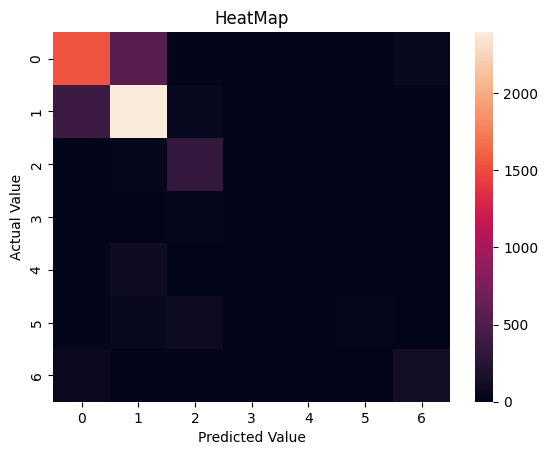

In [23]:
sns.heatmap(cm)
plt.title('HeatMap')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()


## Task 7

Consider only two features and three classes and train Logistic Regression 3-class Classifier (Any three-class) to show the training and test area in a 2-D plane, using matplotlib.

In [24]:
# sub_X_train: This line creates a new DataFrame sub_X_train by selecting a subset
# of the original feature matrix X. Specifically, it selects all rows (samples) and the first two columns (features) of X.
# The iloc method is used to perform integer-based indexing of rows and columns.

In [25]:
sub_X_train = X.iloc[:, 0:2]
sub_y_train = y
# sub_train: This line creates a new DataFrame sub_train by joining (concatenating) the sub_X_train DataFrame
# (containing the selected features) and the sub_y_train DataFrame (containing the target labels).
# This operation combines the selected features and their corresponding target labels into a single DataFrame for further processing
sub_train = sub_X_train.join(sub_y_train)
# sub_train: This line filters the sub_train DataFrame to include only rows
# where the 'Cover_Type' column contains values that are in the list [1, 2, 3].
# In other words, it keeps only the rows where the 'Cover_Type' is one of these
# three values (1, 2, or 3), effectively creating a subset of the data that is focused on these specific classes.
sub_train = sub_train[sub_train['Cover_Type'].isin([1,2,3])]

sub_X = sub_train.drop('Cover_Type', axis = 1)
sub_y = sub_train['Cover_Type']



Before undersampling:  Counter({2: 28333, 1: 21186, 3: 3584})


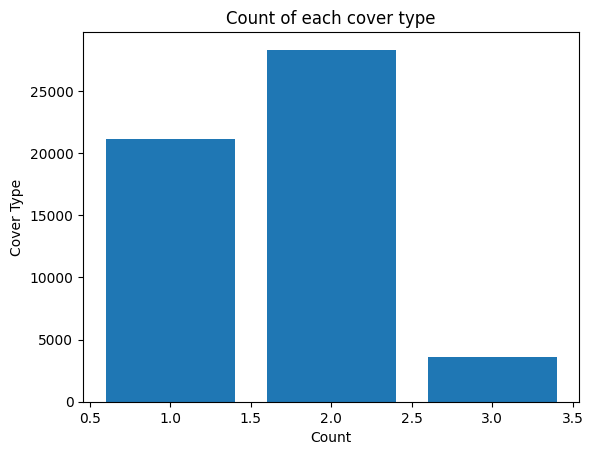

In [26]:
plot_count(sub_y)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(sub_X, sub_y, train_size=0.8)

In [28]:
regr = LogisticRegression(multi_class='multinomial')
model = regr.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f"Accuracy (Test) = {model.score(X_test, y_test)}")
print(f"Accuracy (Train) = {model.score(X_train, y_train)}")
print(f"F1 Score (Test)= {f1_score(y_test, y_pred_test, average='macro')}")
print(f"F1 Score (Train)= {f1_score(y_train, y_pred_train, average='macro')}")


Accuracy (Test) = 0.7337350531964975
Accuracy (Train) = 0.7331340332376065
F1 Score (Test)= 0.7401354997776375
F1 Score (Train)= 0.7391906405764246


In [ ]:
# The purpose of combining the feature matrix (X_train) and the target labels
# (y_train) into a single DataFrame (df_train) is often for data organization and convenience.
# It allows you to have all the relevant training data in one DataFrame, making it easier to perform various
# data analysis and modeling tasks. However, keep in mind that any modifications made to df_train will also affect
# X_train since they share the same data, so you should use this approach carefully to avoid unintended side effects.

In [29]:
df_train = X_train
df_train['CoverType'] = y_train
df_train

,Elevation,Aspect,CoverType
405502,-0.308465,0.172840,2
230963,-0.726345,-1.301511,2
441977,1.095185,0.315808,2
410397,-0.501332,0.360485,2
549830,1.688075,0.566001,1
...,...,...,...
27932,-0.097739,-1.364059,2
440324,-0.012020,-0.658158,2
287988,0.048698,1.316580,2
303607,0.673733,-0.068417,2


In [31]:
df_test = X_test
df_test['CoverType'] = y_test
df_test

,Elevation,Aspect,CoverType
397884,1.077326,0.566001,2
278664,0.630873,1.504224,2
469847,0.934461,0.905548,2
416938,0.823741,0.244324,1
572208,-0.876353,0.324743,3
...,...,...,...
292340,1.023752,1.539966,1
78129,-0.101310,1.003838,2
512464,0.823741,1.388063,1
468086,1.109471,1.781224,1


In [32]:
df_pred_test = X_test
df_pred_test['CoverType'] = y_pred_test
df_pred_test

,Elevation,Aspect,CoverType
397884,1.077326,0.566001,1
278664,0.630873,1.504224,1
469847,0.934461,0.905548,1
416938,0.823741,0.244324,1
572208,-0.876353,0.324743,2
...,...,...,...
292340,1.023752,1.539966,1
78129,-0.101310,1.003838,2
512464,0.823741,1.388063,1
468086,1.109471,1.781224,1


In [33]:
df_pred_train = X_train
df_pred_train['CoverType'] = y_pred_train
df_pred_train

,Elevation,Aspect,CoverType
405502,-0.308465,0.172840,2
230963,-0.726345,-1.301511,2
441977,1.095185,0.315808,1
410397,-0.501332,0.360485,2
549830,1.688075,0.566001,1
...,...,...,...
27932,-0.097739,-1.364059,2
440324,-0.012020,-0.658158,2
287988,0.048698,1.316580,2
303607,0.673733,-0.068417,1


In [30]:
# this code is organizing and splitting the data into separate subsets for each of the three
# classes (1, 2, and 3) in both the training and testing datasets (df_train, df_test, df_pred_test, and df_pred_train).
# This organization can be helpful when we want to analyze or model data separately for each class or perform
# class-specific operations.

In [34]:
df_trains = [df_train[df_train['CoverType'] == i] for i in [1, 2, 3]]
df_tests = [df_test[df_test['CoverType'] == i] for i in [1, 2, 3]]
df_pred_tests = [df_pred_test[df_pred_test['CoverType'] == i] for i in [1, 2, 3]]
df_pred_trains = [df_pred_train[df_pred_train['CoverType'] == i] for i in [1, 2, 3]]

In [35]:
df_trains

[        Elevation    Aspect  CoverType
 441977   1.095185  0.315808          1
 549830   1.688075  0.566001          1
 218077   1.570211  1.539966          1
 151670   1.016609 -0.649222          1
 35020    0.466578 -0.801125          1
 ...           ...       ...        ...
 203328   0.545154  1.611450          1
 480655   1.530923  0.896613          1
 466508   1.045182  0.932355          1
 303607   0.673733 -0.068417          1
 397527   0.513009 -0.881544          1
 
 [15926 rows x 3 columns],
         Elevation    Aspect  CoverType
 405502  -0.308465  0.172840          2
 230963  -0.726345 -1.301511          2
 410397  -0.501332  0.360485          2
 131127  -0.154885  1.799095          2
 33256   -0.097739 -0.184578          2
 ...           ...       ...        ...
 52712    0.173705 -0.720706          2
 370164   0.402289  0.458775          2
 27932   -0.097739 -1.364059          2
 440324  -0.012020 -0.658158          2
 287988   0.048698  1.316580          2
 
 [24203 r

In [36]:
def plot_scatter(title, dfs):
  plt.xlabel("Aspect")
  plt.ylabel("Elevation")
  plt.title(title)
  for _df in dfs:
    plt.scatter(_df['Aspect'], _df['Elevation'])

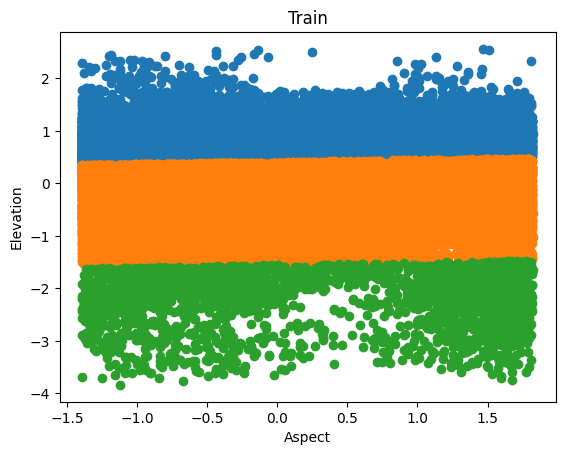

In [37]:
plot_scatter("Train", df_trains)


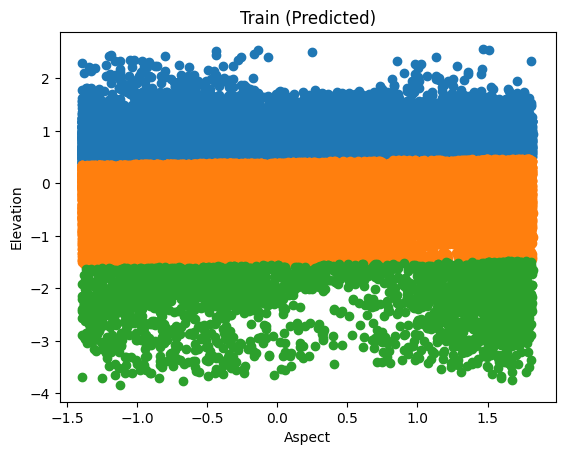

In [38]:
plot_scatter("Train (Predicted)", df_pred_trains)

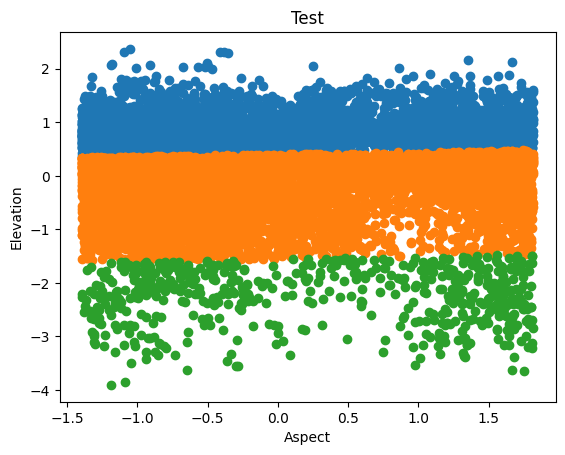

In [39]:
plot_scatter("Test", df_tests)



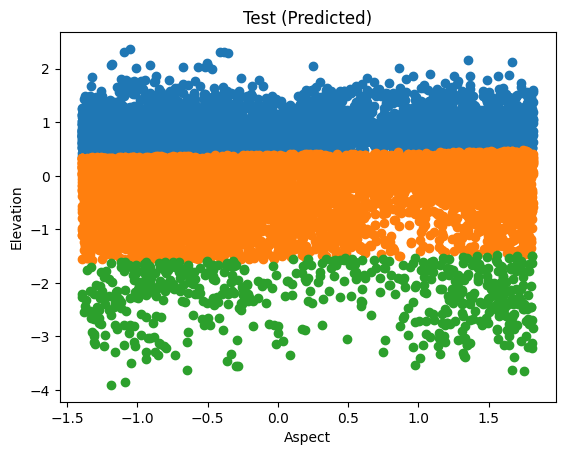

In [40]:
plot_scatter("Test (Predicted)", df_pred_tests)